In [2]:
import os
import re
import sklearn
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from collections import Counter
from sklearn.metrics import *
from sklearn.linear_model import *
from sklearn.model_selection import *
pd.set_option('display.max_columns', 500)

Load Data

Season Detailed Results

In [3]:
dstats = pd.read_csv('/Users/seancollins/Desktop/DATA 3000 Project/mens-march-mania-2022/MDataFiles_Stage2/MRegularSeasonDetailedResults.csv')

In [4]:
dstats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
0,2003,10,1104,68,1328,62,N,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,10,1272,70,1393,63,N,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,11,1266,73,1437,61,N,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,11,1296,56,1457,50,N,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,11,1400,77,1208,71,N,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14


In [5]:
#home and away
dstats['WLoc'] = dstats['WLoc'].apply(lambda x: 1 if x=='H' else 0)
dstats['LLoc'] = 1 - dstats['WLoc']

In [6]:
dstats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LLoc
0,2003,10,1104,68,1328,62,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1
1,2003,10,1272,70,1393,63,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1
2,2003,11,1266,73,1437,61,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1
3,2003,11,1296,56,1457,50,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1
4,2003,11,1400,77,1208,71,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1


In [7]:
dstats.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF',
       'LLoc'],
      dtype='object')

In [8]:
wcols = ['Season', 'WTeamID', 'WScore', 'WLoc',
         'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM',
           'WFTA', 'WOR', 'WDR', 'WAst', 'WTO', 
           'WStl', 'WBlk', 'WPF']
winners_df = dstats[wcols].rename(columns={
    'WTeamID' : 'TeamID', 'WScore' : 'Score', 
    'WLoc' : 'Loc', 'WFGM':'FGM', 'WFGA':'FGA',
    'WFGM3':'FGM3', 'WFGA3':'FGA3', 'WFTM':'FTM',
    'WFTA':'FTA', 'WOR':'OR', 'WDR':'DR', 
    'WAst':'Ast', 'WTO':'TO', 'WStl':'Stl', 
    'WBlk':'Blk', 'WPF':'PF'
})

In [9]:
lcols = [
    'Season', 'LTeamID', 'LScore', 'LLoc',
    'LFGM', 'LFGA', 'LFGM3', 'LFGA3', 'LFTM',
    'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 
    'LStl', 'LBlk', 'LPF'
]
losers_df = dstats[lcols].rename(columns={
    'LTeamID' : 'TeamID', 'LScore' : 'Score', 
    'LLoc' : 'Loc', 'LFGM':'FGM', 'LFGA':'FGA',
    'LFGM3':'FGM3', 'LFGA3':'FGA3', 'LFTM':'FTM',
    'LFTA':'FTA', 'LOR':'OR', 'LDR':'DR', 
    'LAst':'Ast', 'LTO':'TO', 'LStl':'Stl', 
    'LBlk':'Blk', 'LPF':'PF'
})

In [10]:
winners_df.head()

,Season,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1104,68,0,27,58,3,14,11,18,14,24,13,23,7,1,22
1,2003,1272,70,0,26,62,8,20,10,19,15,28,16,13,4,4,18
2,2003,1266,73,0,24,58,8,18,17,29,17,26,15,10,5,2,25
3,2003,1296,56,0,18,38,3,9,17,31,6,19,11,12,14,2,18
4,2003,1400,77,0,30,61,6,14,11,13,17,22,12,14,4,4,20


In [11]:
losers_df.head()

,Season,TeamID,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF
0,2003,1328,62,1,22,53,2,10,16,22,10,22,8,18,9,2,20
1,2003,1393,63,1,24,67,6,24,9,20,20,25,7,12,8,6,16
2,2003,1437,61,1,22,73,3,26,14,23,31,22,9,12,2,5,23
3,2003,1457,50,1,18,49,6,22,8,15,17,20,9,19,4,3,23
4,2003,1208,71,1,24,62,6,16,17,27,21,15,12,10,7,1,14


In [12]:
a = pd.concat([winners_df, losers_df]).groupby(['Season', 'TeamID']).agg(Num=('TeamID', 'count'))
b = pd.concat([winners_df, losers_df]).groupby(['Season', 'TeamID']).sum()
all_df = pd.concat([a,b], axis=1)
all_df.head()

Num  Score  Loc  FGM   FGA  FGM3  FGA3  FTM  FTA   OR   DR  \
Season TeamID                                                               
2003   1102     28   1603   15  536  1114   219   583  312  479  117  471   
       1103     27   2127   14  733  1508   147   434  514  698  264  538   
       1104     28   1940   16  673  1601   178   556  416  586  380  670   
       1105     26   1866   12  634  1602   197   540  401  568  351  601   
       1106     28   1781   14  656  1548   171   494  298  461  344  668   

               Ast   TO  Stl  Blk   PF  
Season TeamID                           
2003   1102    364  320  167   50  525  
       1103    411  341  196   63  536  
       1104    339  372  185  106  505  
       1105    378  485  242   54  526  
       1106    327  477  234   88  509

In [13]:
#calculate true shooting 
all_df['TS'] = round(all_df['Score']/(2*(all_df['FGA']+0.44*all_df['FTA'])),3)

#calculate turnover %%
all_df['TO%'] = round(all_df['TO']/(all_df['FGA']+0.44*all_df['FTA']+all_df['TO']),3)

#field goal percentage
all_df['FGpct'] = round(all_df['FGM']/all_df['FGA'],3)

#3 pt percentage
all_df['3FGpct'] = round(all_df['FGM3']/all_df['FGA3'],3)

#assist to turnover ratio
all_df['AST/TO'] = round(all_df['Ast']/all_df['TO'],3)

all_df = all_df.reset_index()

In [14]:
all_df.head()

,Season,TeamID,Num,Score,Loc,FGM,FGA,FGM3,FGA3,FTM,FTA,OR,DR,Ast,TO,Stl,Blk,PF,TS,TO%,FGpct,3FGpct,AST/TO
0,2003,1102,28,1603,15,536,1114,219,583,312,479,117,471,364,320,167,50,525,0.605,0.195,0.481,0.376,1.138
1,2003,1103,27,2127,14,733,1508,147,434,514,698,264,538,411,341,196,63,536,0.586,0.158,0.486,0.339,1.205
2,2003,1104,28,1940,16,673,1601,178,556,416,586,380,670,339,372,185,106,505,0.522,0.167,0.420,0.320,0.911
3,2003,1105,26,1866,12,634,1602,197,540,401,568,351,601,378,485,242,54,526,0.504,0.208,0.396,0.365,0.779
4,2003,1106,28,1781,14,656,1548,171,494,298,461,344,668,327,477,234,88,509,0.509,0.214,0.424,0.346,0.686


In [15]:
team_3pct = all_df[['Season', 'TeamID', '3FGpct']]

In [16]:
# single game 3pt shooting percentage
dstats['W_3pct'] = dstats['WFGM3']/dstats['WFGA3']
dstats['L_3pct'] = dstats['LFGM3']/dstats['LFGA3']

In [17]:
#average 3pt percentage for the season
dstats = pd.merge(dstats, team_3pct, how='left', left_on=['Season', 'WTeamID'],
                  right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1).rename(columns={'3FGpct':'W_3pct_avg'})
dstats = pd.merge(dstats, team_3pct, how='left', left_on=['Season', 'LTeamID'],
                  right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1).rename(columns={'3FGpct':'L_3pct_avg'})


In [18]:
dstats.head()

,Season,DayNum,WTeamID,WScore,LTeamID,LScore,WLoc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF,LLoc,W_3pct,L_3pct,W_3pct_avg,L_3pct_avg
0,2003,10,1104,68,1328,62,0,0,27,58,3,14,11,18,14,24,13,23,7,1,22,22,53,2,10,16,22,10,22,8,18,9,2,20,1,0.214286,0.200000,0.320,0.394
1,2003,10,1272,70,1393,63,0,0,26,62,8,20,10,19,15,28,16,13,4,4,18,24,67,6,24,9,20,20,25,7,12,8,6,16,1,0.400000,0.250000,0.349,0.330
2,2003,11,1266,73,1437,61,0,0,24,58,8,18,17,29,17,26,15,10,5,2,25,22,73,3,26,14,23,31,22,9,12,2,5,23,1,0.444444,0.115385,0.379,0.349
3,2003,11,1296,56,1457,50,0,0,18,38,3,9,17,31,6,19,11,12,14,2,18,18,49,6,22,8,15,17,20,9,19,4,3,23,1,0.333333,0.272727,0.383,0.352
4,2003,11,1400,77,1208,71,0,0,30,61,6,14,11,13,17,22,12,14,4,4,20,24,62,6,16,17,27,21,15,12,10,7,1,14,1,0.428571,0.375000,0.349,0.380


In [19]:
#difference between 3 point percentage and average 3 point percentage in a single game
dstats['W_3pct_diff'] = dstats['W_3pct'] - dstats['W_3pct_avg']
dstats['L_3pct_diff'] = dstats['L_3pct'] - dstats['L_3pct_avg']

In [20]:
#point differential
dstats['ScoreGap'] = dstats['WScore'] - dstats['LScore']

In [21]:
#groupby
win = dstats.groupby(['Season', 'WTeamID']).agg(WNum=('DayNum', 'count'),
                                                AvgWpts=('ScoreGap', 'mean'),
                                                TotalWPoints=('WScore', 'sum'),
                                                WDefense_3pct=('W_3pct_diff', 'mean'),
                                                ).reset_index().rename(columns={'WTeamID' : 'TeamID'})
loss = dstats.groupby(['Season', 'LTeamID']).agg(LNum=('DayNum', 'count'),
                                                AvgLpts=('ScoreGap', 'mean'),
                                                TotalLPoints=('LScore', 'sum'),
                                                LDefense_3pct=('L_3pct_diff', 'mean'),
                                                ).reset_index().rename(columns={'LTeamID' : 'TeamID'})


In [22]:
df_features_d = win.merge(loss, on=['Season','TeamID'], how='outer').drop_duplicates().sort_values(['Season', 'TeamID']).reset_index(drop=True)
df_features_d.fillna(0, inplace=True)

In [23]:
df_features_d.head(

)

,Season,TeamID,WNum,AvgWpts,TotalWPoints,WDefense_3pct,LNum,AvgLpts,TotalLPoints,LDefense_3pct
0,2003,1102,12.0,15.583333,825.0,0.073882,16.0,11.250000,778.0,-0.070047
1,2003,1103,13.0,9.384615,1141.0,0.023828,14.0,7.500000,986.0,-0.035645
2,2003,1104,17.0,13.176471,1270.0,0.027418,11.0,9.454545,670.0,-0.028522
3,2003,1105,7.0,13.000000,556.0,0.026674,19.0,11.473684,1310.0,-0.017176
4,2003,1106,13.0,10.384615,888.0,0.037482,15.0,9.266667,893.0,-0.024652


In [24]:
#winning percentage
df_features_d['WinRatio'] = df_features_d['WNum'] / (df_features_d['WNum'] + df_features_d['LNum'])

#averge ppg
df_features_d['AvgScoreGap'] = (
    (df_features_d['WNum']*df_features_d['AvgWpts']-df_features_d['LNum']*df_features_d['AvgLpts'])
    /(df_features_d['WNum'] + df_features_d['LNum']))

#points ratio
df_features_d['PointsRatio'] = df_features_d['TotalWPoints'] / (df_features_d['TotalWPoints'] + df_features_d['TotalLPoints'])

#3 point defense, positive means poor defense --> increases opponents shooting %
df_features_d['AvgDefense3pct'] = (
    100*(df_features_d['WNum']*df_features_d['WDefense_3pct']+df_features_d['LNum']*df_features_d['LDefense_3pct'])
    /(df_features_d['WNum'] + df_features_d['LNum']))


In [25]:
df_features_d.head()

,Season,TeamID,WNum,AvgWpts,TotalWPoints,WDefense_3pct,LNum,AvgLpts,TotalLPoints,LDefense_3pct,WinRatio,AvgScoreGap,PointsRatio,AvgDefense3pct
0,2003,1102,12.0,15.583333,825.0,0.073882,16.0,11.250000,778.0,-0.070047,0.428571,0.250000,0.514660,-0.836278
1,2003,1103,13.0,9.384615,1141.0,0.023828,14.0,7.500000,986.0,-0.035645,0.481481,0.629630,0.536436,-0.700997
2,2003,1104,17.0,13.176471,1270.0,0.027418,11.0,9.454545,670.0,-0.028522,0.607143,4.285714,0.654639,0.544187
3,2003,1105,7.0,13.000000,556.0,0.026674,19.0,11.473684,1310.0,-0.017176,0.269231,-4.884615,0.297964,-0.537018
4,2003,1106,13.0,10.384615,888.0,0.037482,15.0,9.266667,893.0,-0.024652,0.464286,-0.142857,0.498596,0.419582


In [26]:
cols = ['Season', 'TeamID', 'WinRatio', 'AvgScoreGap', 'PointsRatio', 'AvgDefense3pct']
df_features_d[cols]

,Season,TeamID,WinRatio,AvgScoreGap,PointsRatio,AvgDefense3pct
0,2003,1102,0.428571,0.250000,0.514660,-0.836278
1,2003,1103,0.481481,0.629630,0.536436,-0.700997
2,2003,1104,0.607143,4.285714,0.654639,0.544187
3,2003,1105,0.269231,-4.884615,0.297964,-0.537018
4,2003,1106,0.464286,-0.142857,0.498596,0.419582
...,...,...,...,...,...,...
6887,2022,1468,0.551724,-2.482759,0.601218,-0.016093
6888,2022,1469,0.333333,-8.000000,0.379761,-0.205070
6889,2022,1470,0.392857,-2.678571,0.438914,-0.656198
6890,2022,1471,0.407407,-3.259259,0.471289,0.333560


In [27]:
df_features_d.columns

Index(['Season', 'TeamID', 'WNum', 'AvgWpts', 'TotalWPoints', 'WDefense_3pct',
       'LNum', 'AvgLpts', 'TotalLPoints', 'LDefense_3pct', 'WinRatio',
       'AvgScoreGap', 'PointsRatio', 'AvgDefense3pct'],
      dtype='object')

Text(0, 0.5, 'Defense')

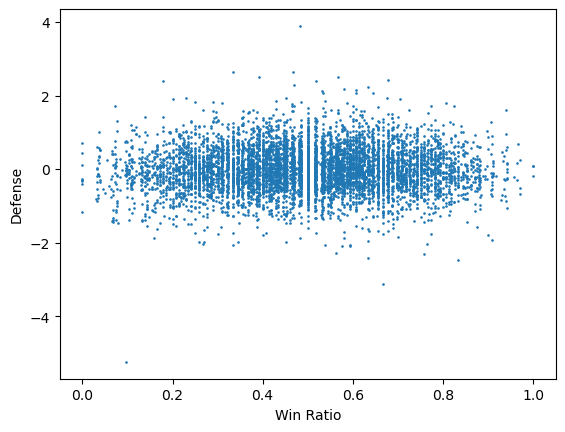

In [28]:
plt.scatter(df_features_d['WinRatio'],df_features_d['AvgDefense3pct'],s=0.8)
plt.xlabel('Win Ratio')
plt.ylabel('Defense')

Text(0, 0.5, 'AvgScoreGap')

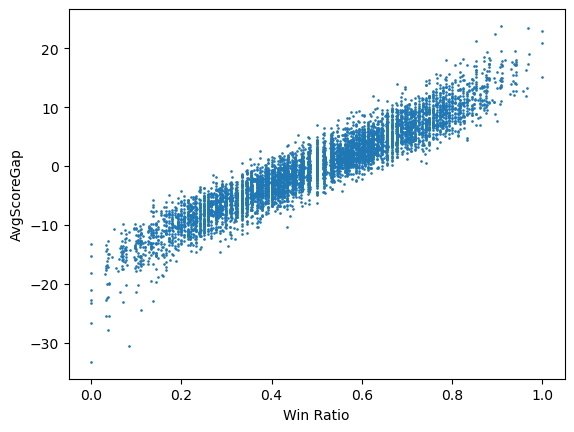

In [29]:
plt.scatter(df_features_d['WinRatio'],df_features_d['AvgScoreGap'],s=0.8) 
plt.xlabel('Win Ratio')
plt.ylabel('AvgScoreGap')

Text(0, 0.5, 'PointsRatio')

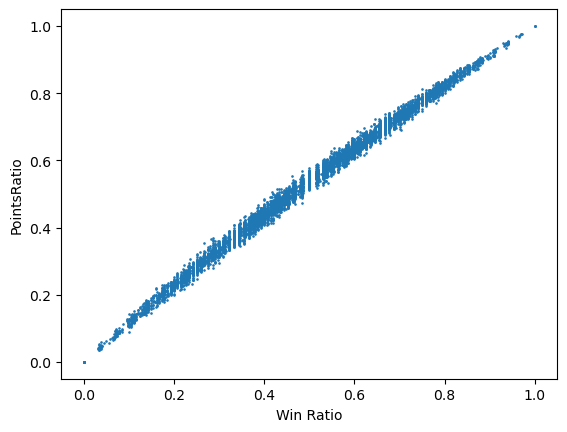

In [30]:
plt.scatter(df_features_d['WinRatio'],df_features_d['PointsRatio'],s=0.8) 
plt.xlabel('Win Ratio')
plt.ylabel('PointsRatio')

In [31]:
all_df.columns

Index(['Season', 'TeamID', 'Num', 'Score', 'Loc', 'FGM', 'FGA', 'FGM3', 'FGA3',
       'FTM', 'FTA', 'OR', 'DR', 'Ast', 'TO', 'Stl', 'Blk', 'PF', 'TS', 'TO%',
       'FGpct', '3FGpct', 'AST/TO'],
      dtype='object')

In [32]:
cols = ['Season', 'TeamID', 'TS', 'TO', 'AST/TO']
df_self = all_df[cols]

cols=['Season', 'TeamID', 'WinRatio', 'AvgScoreGap', 'PointsRatio', 'AvgDefense3pct']
df_pk = df_features_d[cols]

df_final = df_self.merge(df_pk)

In [33]:
df_final

,Season,TeamID,TS,TO,AST/TO,WinRatio,AvgScoreGap,PointsRatio,AvgDefense3pct
0,2003,1102,0.605,320,1.138,0.428571,0.250000,0.514660,-0.836278
1,2003,1103,0.586,341,1.205,0.481481,0.629630,0.536436,-0.700997
2,2003,1104,0.522,372,0.911,0.607143,4.285714,0.654639,0.544187
3,2003,1105,0.504,485,0.779,0.269231,-4.884615,0.297964,-0.537018
4,2003,1106,0.509,477,0.686,0.464286,-0.142857,0.498596,0.419582
...,...,...,...,...,...,...,...,...,...
6887,2022,1468,0.561,254,1.524,0.551724,-2.482759,0.601218,-0.016093
6888,2022,1469,0.504,405,0.960,0.333333,-8.000000,0.379761,-0.205070
6889,2022,1470,0.514,287,1.021,0.392857,-2.678571,0.438914,-0.656198
6890,2022,1471,0.561,331,1.076,0.407407,-3.259259,0.471289,0.333560


Tournament Detailed Results

In [34]:
df_tourney_d = pd.read_csv('/Users/seancollins/Desktop/DATA 3000 Project/mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneyDetailedResults.csv')
df_tourney_d.columns

Index(['Season', 'DayNum', 'WTeamID', 'WScore', 'LTeamID', 'LScore', 'WLoc',
       'NumOT', 'WFGM', 'WFGA', 'WFGM3', 'WFGA3', 'WFTM', 'WFTA', 'WOR', 'WDR',
       'WAst', 'WTO', 'WStl', 'WBlk', 'WPF', 'LFGM', 'LFGA', 'LFGM3', 'LFGA3',
       'LFTM', 'LFTA', 'LOR', 'LDR', 'LAst', 'LTO', 'LStl', 'LBlk', 'LPF'],
      dtype='object')

In [35]:
df_tourney_d = df_tourney_d.rename(columns={
   'WTeamID':'W_TeamID', 'LTeamID':'L_TeamID', 'WScore':'W_Score', 'LScore':'L_Score',
    'WLoc':'W_Loc'
})

In [36]:
df_tourney_d[df_tourney_d['Season']==2019]

,Season,DayNum,W_TeamID,W_Score,L_TeamID,L_Score,W_Loc,NumOT,WFGM,WFGA,WFGM3,WFGA3,WFTM,WFTA,WOR,WDR,WAst,WTO,WStl,WBlk,WPF,LFGM,LFGA,LFGM3,LFGA3,LFTM,LFTA,LOR,LDR,LAst,LTO,LStl,LBlk,LPF
1048,2019,134,1125,81,1396,70,N,0,28,53,9,23,16,21,3,30,15,11,6,4,12,28,71,7,22,7,13,15,24,13,11,7,1,22
1049,2019,134,1192,82,1341,76,N,0,30,55,9,21,13,19,13,27,12,17,1,8,10,28,64,15,28,5,7,10,17,17,12,9,1,19
1050,2019,135,1113,74,1385,65,N,0,22,49,5,12,25,33,6,36,12,21,5,2,18,22,69,8,31,13,23,16,27,9,16,11,1,22
1051,2019,135,1295,78,1300,74,N,0,25,52,9,20,19,24,8,21,12,6,0,3,14,24,57,9,21,17,21,15,23,17,9,0,2,20
1052,2019,136,1120,78,1308,77,N,0,26,57,12,31,14,21,6,18,13,10,9,2,24,25,51,7,25,20,27,11,28,14,16,6,2,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,2019,146,1120,77,1246,71,N,1,26,65,7,23,18,24,12,25,8,9,10,7,21,27,61,5,21,12,21,11,30,14,14,5,5,19
1111,2019,146,1277,68,1181,67,N,0,30,70,6,19,2,6,11,20,18,7,11,3,11,26,57,7,21,8,13,13,29,14,17,4,9,9
1112,2019,152,1403,61,1277,51,N,0,22,51,9,23,8,13,3,27,8,7,4,4,18,15,47,7,24,14,18,8,28,6,11,1,2,15
1113,2019,152,1438,63,1120,62,N,0,25,51,7,19,6,12,5,26,15,8,1,9,12,21,55,9,31,11,14,9,24,9,5,3,3,12


Feature Engineering

In [37]:
# create team list
cols = ['Season', 'DayNum', 'W_TeamID', 'L_TeamID', 'W_Score', 'L_Score']
df = df_tourney_d[cols].copy()
df

,Season,DayNum,W_TeamID,L_TeamID,W_Score,L_Score
0,2003,134,1421,1411,92,84
1,2003,136,1112,1436,80,51
2,2003,136,1113,1272,84,71
3,2003,136,1141,1166,79,73
4,2003,136,1143,1301,76,74
...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66
1177,2021,148,1417,1276,51,49
1178,2021,152,1124,1222,78,59
1179,2021,152,1211,1417,93,90


In [38]:
df_seeds = pd.read_csv('/Users/seancollins/Desktop/DATA 3000 Project/mens-march-mania-2022/MDataFiles_Stage2/MNCAATourneySeeds.csv')
df_seeds

,Season,Seed,TeamID
0,1985,W01,1207
1,1985,W02,1210
2,1985,W03,1228
3,1985,W04,1260
4,1985,W05,1374
...,...,...,...
2417,2022,Z13,1151
2418,2022,Z14,1255
2419,2022,Z15,1174
2420,2022,Z16a,1136


In [39]:
# merge with seeds
df = pd.merge(df, df_seeds, how='left', 
    left_on=['Season', 'W_TeamID'], right_on=['Season', 'TeamID']
             ).drop('TeamID', axis=1).rename(columns={'Seed': 'W_Seed'})

df = pd.merge(df, df_seeds, how='left', 
    left_on=['Season', 'L_TeamID'], right_on=['Season', 'TeamID']
             ).drop('TeamID', axis=1).rename(columns={'Seed': 'L_Seed'})


In [40]:
df

,Season,DayNum,W_TeamID,L_TeamID,W_Score,L_Score,W_Seed,L_Seed
0,2003,134,1421,1411,92,84,X16b,X16a
1,2003,136,1112,1436,80,51,Z01,Z16
2,2003,136,1113,1272,84,71,Z10,Z07
3,2003,136,1141,1166,79,73,Z11,Z06
4,2003,136,1143,1301,76,74,W08,W09
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66,X01,X06
1177,2021,148,1417,1276,51,49,W11b,W01
1178,2021,152,1124,1222,78,59,Z01,Y02
1179,2021,152,1211,1417,93,90,X01,W11b


In [41]:
# only get the number, remove the region letter
def treat_seed(seed):
    return int(re.sub("[^0-9]", "", seed))

df['W_Seed'] = df['W_Seed'].apply(treat_seed)
df['L_Seed'] = df['L_Seed'].apply(treat_seed)

In [42]:
df

,Season,DayNum,W_TeamID,L_TeamID,W_Score,L_Score,W_Seed,L_Seed
0,2003,134,1421,1411,92,84,16,16
1,2003,136,1112,1436,80,51,1,16
2,2003,136,1113,1272,84,71,10,7
3,2003,136,1141,1166,79,73,11,6
4,2003,136,1143,1301,76,74,8,9
...,...,...,...,...,...,...,...,...
1176,2021,148,1211,1425,85,66,1,6
1177,2021,148,1417,1276,51,49,11,1
1178,2021,152,1124,1222,78,59,1,2
1179,2021,152,1211,1417,93,90,1,11


In [43]:
# merge with features
df = pd.merge(df, df_final, how='left',
    left_on=['Season', 'W_TeamID'], right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1)

df = pd.merge(df, df_final, how='left',
    left_on=['Season', 'L_TeamID'], right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1)

In [44]:
def replace_win_loser(df):
    team_a = df.copy()
    team_b = df.copy()
    
    team_a_dict, team_b_dict = {}, {}
    
    for col in team_a.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'A_')
            team_a_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = str(col).replace('L_', 'B_')    
            team_a_dict[col] = new_col_name
        if col.find('_x') > 0:
            new_col_name = str(col).replace('_x', '_A')
            team_a_dict[col] = new_col_name
        if col.find('_y') > 0:
            new_col_name = str(col).replace('_y', '_B')    
            team_a_dict[col] = new_col_name
            
    for col in team_b.columns:
        if col.find('W_') == 0:
            new_col_name = str(col).replace('W_', 'B_')
            team_b_dict[col] = new_col_name
        if col.find('L_') == 0:
            new_col_name = str(col).replace('L_', 'A_')
            team_b_dict[col] = new_col_name
        if col.find('_x') > 0:
            new_col_name = str(col).replace('_x', '_B')
            team_b_dict[col] = new_col_name
        if col.find('_y') > 0:
            new_col_name = str(col).replace('_y', '_A')    
            team_b_dict[col] = new_col_name

    team_a = team_a.rename(columns = team_a_dict)
    team_b = team_b.rename(columns = team_b_dict)
    
    merged_df = pd.concat([team_a, team_b], axis = 0, sort = False)
    return merged_df

In [45]:
df = replace_win_loser(df).reset_index(drop=True)

In [46]:
# differences between A team and B team

cols_to_diff = ['Seed']

for col in cols_to_diff:
    df[col + 'Diff'] = df['A_'+col] - df['B_'+col]
    
cols_to_diff2 = ['TS', 'TO', 'AST/TO', 'WinRatio','AvgScoreGap', 'PointsRatio', 'AvgDefense3pct']

for col in cols_to_diff2:
    df[col + 'Diff'] = df[col+'_A'] - df[col+'_B']

In [47]:
df.columns

Index(['Season', 'DayNum', 'A_TeamID', 'B_TeamID', 'A_Score', 'B_Score',
       'A_Seed', 'B_Seed', 'TS_A', 'TO_A', 'AST/TO_A', 'WinRatio_A',
       'AvgScoreGap_A', 'PointsRatio_A', 'AvgDefense3pct_A', 'TS_B', 'TO_B',
       'AST/TO_B', 'WinRatio_B', 'AvgScoreGap_B', 'PointsRatio_B',
       'AvgDefense3pct_B', 'SeedDiff', 'TSDiff', 'TODiff', 'AST/TODiff',
       'WinRatioDiff', 'AvgScoreGapDiff', 'PointsRatioDiff',
       'AvgDefense3pctDiff'],
      dtype='object')

In [48]:
# Create target variable

df['ScoreDiff'] = df['A_Score'] - df['B_Score']
df['A_Win'] = (df['ScoreDiff'] > 0).astype(int)
df = df.drop(columns=['A_Score', 'B_Score','ScoreDiff'])

In [49]:
df

,Season,DayNum,A_TeamID,B_TeamID,A_Seed,B_Seed,TS_A,TO_A,AST/TO_A,WinRatio_A,AvgScoreGap_A,PointsRatio_A,AvgDefense3pct_A,TS_B,TO_B,AST/TO_B,WinRatio_B,AvgScoreGap_B,PointsRatio_B,AvgDefense3pct_B,SeedDiff,TSDiff,TODiff,AST/TODiff,WinRatioDiff,AvgScoreGapDiff,PointsRatioDiff,AvgDefense3pctDiff,A_Win
0,2003,134,1421,1411,16,16,0.539,470,0.804,0.448276,-7.241379,0.500726,0.349406,0.538,457,0.932,0.600000,1.966667,0.637363,0.041405,0,0.001,13,-0.128,-0.151724,-9.208046,-0.136636,0.308001,1
1,2003,136,1112,1436,1,16,0.555,414,1.193,0.892857,14.964286,0.903185,0.006036,0.526,408,1.010,0.655172,4.655172,0.693795,1.691965,-15,0.029,6,0.183,0.237685,10.309113,0.209391,-1.685929,1
2,2003,136,1113,1272,10,7,0.555,406,1.111,0.620690,6.793103,0.659555,1.037622,0.532,400,1.205,0.793103,8.689655,0.796391,-0.555906,3,0.023,6,-0.094,-0.172414,-1.896552,-0.136835,1.593528,1
3,2003,136,1141,1166,11,6,0.622,529,0.856,0.793103,6.103448,0.833116,-0.351853,0.598,441,1.259,0.878788,14.909091,0.894837,-0.408620,5,0.024,88,-0.403,-0.085684,-8.805643,-0.061721,0.056767,1
4,2003,136,1143,1301,8,9,0.553,411,1.129,0.724138,4.724138,0.739815,-0.106557,0.581,426,1.033,0.600000,4.400000,0.645488,-0.343620,-1,-0.028,-15,0.096,0.124138,0.324138,0.094327,0.237063,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2357,2021,148,1425,1211,6,1,0.552,351,1.128,0.758621,9.655172,0.796587,-0.062892,0.640,310,1.535,1.000000,23.000000,1.000000,-0.180805,5,-0.088,41,-0.407,-0.241379,-13.344828,-0.203413,0.117913,0
2358,2021,148,1276,1417,1,11,0.587,256,1.449,0.833333,10.875000,0.868306,-0.049610,0.558,283,1.251,0.653846,4.346154,0.684266,1.166249,-10,0.029,-27,0.198,0.179487,6.528846,0.184040,-1.215859,0
2359,2021,152,1222,1124,2,1,0.553,264,1.348,0.884615,18.000000,0.899194,-0.710690,0.598,292,1.401,0.916667,17.958333,0.934815,-0.195084,1,-0.045,-28,-0.053,-0.032051,0.041667,-0.035621,-0.515606,0
2360,2021,152,1417,1211,11,1,0.558,283,1.251,0.653846,4.346154,0.684266,1.166249,0.640,310,1.535,1.000000,23.000000,1.000000,-0.180805,10,-0.082,-27,-0.284,-0.346154,-18.653846,-0.315734,1.347053,0


Test Data

In [50]:
df_test = pd.read_csv('/Users/seancollins/Desktop/DATA 3000 Project/mens-march-mania-2022/MDataFiles_Stage2/MSampleSubmissionStage2.csv')
df_test['Season'] = df_test['ID'].apply(lambda x: int(x.split('_')[0]))
df_test['A_TeamID'] = df_test['ID'].apply(lambda x: int(x.split('_')[1]))
df_test['B_TeamID'] = df_test['ID'].apply(lambda x: int(x.split('_')[2]))


In [51]:
# merge with seeds
df_test = pd.merge(df_test, df_seeds, how='left', 
    left_on=['Season', 'A_TeamID'], right_on=['Season', 'TeamID']
             ).drop('TeamID', axis=1).rename(columns={'Seed': 'A_Seed'})

df_test = pd.merge(df_test, df_seeds, how='left', 
    left_on=['Season', 'B_TeamID'], right_on=['Season', 'TeamID']
             ).drop('TeamID', axis=1).rename(columns={'Seed': 'B_Seed'})



In [52]:
df_test

,ID,Pred,Season,A_TeamID,B_TeamID,A_Seed,B_Seed
0,2022_1103_1104,0.5,2022,1103,1104,W13,X06
1,2022_1103_1112,0.5,2022,1103,1112,W13,Z01
2,2022_1103_1116,0.5,2022,1103,1116,W13,X04
3,2022_1103_1120,0.5,2022,1103,1120,W13,Y02
4,2022_1103_1124,0.5,2022,1103,1124,W13,W01
...,...,...,...,...,...,...,...
2273,2022_1458_1461,0.5,2022,1458,1461,Y03,W12b
2274,2022_1458_1463,0.5,2022,1458,1463,Y03,W14
2275,2022_1460_1461,0.5,2022,1460,1461,Z16b,W12b
2276,2022_1460_1463,0.5,2022,1460,1463,Z16b,W14


In [53]:

def treat_seed(seed):
    print("Original Seed:", seed)
    treated_seed = int(re.sub("[^0-9]", "", str(seed)))
    print("Treated Seed:", treated_seed)
    return treated_seed

# Apply function and check the results
df_test['A_Seed'] = df_test['A_Seed'].apply(treat_seed)
df_test['B_Seed'] = df_test['B_Seed'].apply(treat_seed)


Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated Seed: 13
Original Seed: W13
Treated S

In [54]:
df_test

,ID,Pred,Season,A_TeamID,B_TeamID,A_Seed,B_Seed
0,2022_1103_1104,0.5,2022,1103,1104,13,6
1,2022_1103_1112,0.5,2022,1103,1112,13,1
2,2022_1103_1116,0.5,2022,1103,1116,13,4
3,2022_1103_1120,0.5,2022,1103,1120,13,2
4,2022_1103_1124,0.5,2022,1103,1124,13,1
...,...,...,...,...,...,...,...
2273,2022_1458_1461,0.5,2022,1458,1461,3,12
2274,2022_1458_1463,0.5,2022,1458,1463,3,14
2275,2022_1460_1461,0.5,2022,1460,1461,16,12
2276,2022_1460_1463,0.5,2022,1460,1463,16,14


In [55]:
# merge with features
df_test = pd.merge(df_test, df_final, how='left',
    left_on=['Season', 'A_TeamID'], right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1)

df_test = pd.merge(df_test, df_final, how='left',
    left_on=['Season', 'B_TeamID'], right_on=['Season', 'TeamID']).drop(columns='TeamID', axis=1)


In [56]:
cols_to_diff = ['Seed']


for col in cols_to_diff:
    df_test[col + 'Diff'] = df_test['A_'+col] - df_test['B_'+col]
    
cols_to_diff2 = ['TS', 'TO', 'AST/TO', 'WinRatio','AvgScoreGap', 'PointsRatio', 'AvgDefense3pct']

for col in cols_to_diff2:
    df_test[col + 'Diff'] = df_test[col+'_x'] - df_test[col+'_y']


In [57]:
df_test

,ID,Pred,Season,A_TeamID,B_TeamID,A_Seed,B_Seed,TS_x,TO_x,AST/TO_x,WinRatio_x,AvgScoreGap_x,PointsRatio_x,AvgDefense3pct_x,TS_y,TO_y,AST/TO_y,WinRatio_y,AvgScoreGap_y,PointsRatio_y,AvgDefense3pct_y,SeedDiff,TSDiff,TODiff,AST/TODiff,WinRatioDiff,AvgScoreGapDiff,PointsRatioDiff,AvgDefense3pctDiff
0,2022_1103_1104,0.5,2022,1103,1104,13,6,0.567,336,1.062,0.709677,5.129032,0.752328,0.436930,0.555,451,1.038,0.593750,3.562500,0.617038,0.360124,7,0.012,-115,0.024,0.115927,1.566532,0.135290,0.076805
1,2022_1103_1112,0.5,2022,1103,1112,13,1,0.567,336,1.062,0.709677,5.129032,0.752328,0.436930,0.597,440,1.539,0.911765,17.029412,0.932174,0.209174,12,-0.030,-104,-0.477,-0.202087,-11.900380,-0.179846,0.227755
2,2022_1103_1116,0.5,2022,1103,1116,13,4,0.567,336,1.062,0.709677,5.129032,0.752328,0.436930,0.544,401,1.160,0.757576,8.393939,0.773533,-1.426167,9,0.023,-65,-0.098,-0.047898,-3.264907,-0.021205,1.863097
3,2022_1103_1120,0.5,2022,1103,1120,13,2,0.567,336,1.062,0.709677,5.129032,0.752328,0.436930,0.544,373,1.247,0.843750,11.687500,0.852719,0.531249,11,0.023,-37,-0.185,-0.134073,-6.558468,-0.100392,-0.094319
4,2022_1103_1124,0.5,2022,1103,1124,13,1,0.567,336,1.062,0.709677,5.129032,0.752328,0.436930,0.558,384,1.320,0.812500,12.875000,0.839461,-0.632485,12,0.009,-48,-0.258,-0.102823,-7.745968,-0.087133,1.069415
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2273,2022_1458_1461,0.5,2022,1458,1461,3,12,0.527,261,1.307,0.774194,4.161290,0.792427,0.125211,0.566,346,1.006,0.750000,6.187500,0.784783,-0.391538,-9,-0.039,-85,0.301,0.024194,-2.026210,0.007644,0.516748
2274,2022_1458_1463,0.5,2022,1458,1463,3,14,0.527,261,1.307,0.774194,4.161290,0.792427,0.125211,0.543,367,0.935,0.620690,2.034483,0.648415,0.470806,-11,-0.016,-106,0.372,0.153504,2.126808,0.144012,-0.345596
2275,2022_1460_1461,0.5,2022,1460,1461,16,12,0.562,401,1.135,0.606061,3.545455,0.637903,0.773640,0.566,346,1.006,0.750000,6.187500,0.784783,-0.391538,4,-0.004,55,0.129,-0.143939,-2.642045,-0.146879,1.165178
2276,2022_1460_1463,0.5,2022,1460,1463,16,14,0.562,401,1.135,0.606061,3.545455,0.637903,0.773640,0.543,367,0.935,0.620690,2.034483,0.648415,0.470806,2,0.019,34,0.200,-0.014629,1.510972,-0.010512,0.302834


In [58]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)
df2 = pd.DataFrame(df2, columns=df.columns)

In [59]:
df2[['A_Win','SeedDiff', 'TSDiff', 'TODiff', 'AST/TODiff', 'WinRatioDiff', 'AvgDefense3pctDiff']].corr()


,A_Win,SeedDiff,TSDiff,TODiff,AST/TODiff,WinRatioDiff,AvgDefense3pctDiff
A_Win,1.000000,-0.485451,0.163807,-0.058256,0.247275,0.342834,-0.074230
SeedDiff,-0.485451,1.000000,-0.291486,0.075463,-0.436250,-0.628019,0.062660
TSDiff,0.163807,-0.291486,1.000000,-0.096011,0.417483,0.456288,0.016221
TODiff,-0.058256,0.075463,-0.096011,1.000000,-0.583957,-0.178469,0.034842
AST/TODiff,0.247275,-0.436250,0.417483,-0.583957,1.000000,0.442189,-0.111671
WinRatioDiff,0.342834,-0.628019,0.456288,-0.178469,0.442189,1.000000,-0.080600
AvgDefense3pctDiff,-0.074230,0.062660,0.016221,0.034842,-0.111671,-0.080600,1.000000
